In [12]:
import tensorflow as tf
from d2l import tensorflow as d2l
import numpy as np

In [13]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = tf.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [14]:
def train_wd(wd):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(wd)))
  model.build(input_shape=(1, num_inputs))
  w, b = model.trainable_variables
  loss = tf.keras.losses.MeanSquaredError()
  num_epochs, lr = 100, 0.003
  trainer = tf.keras.optimizers.SGD(learning_rate=lr)
  animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
  for epoch in range(num_epochs):
      for X, y in train_iter:
          with tf.GradientTape() as tape:
              l = loss(model(X), y) + model.losses
          grads = tape.gradient(l, model.trainable_variables)
          trainer.apply_gradients(zip(grads, model.trainable_variables))
      if (epoch + 1) % 5 == 0:
          animator.add(epoch + 1, (d2l.evaluate_loss(model, train_iter, loss),
                                     d2l.evaluate_loss(model, test_iter, loss)))
  print('L2 norm of w:', tf.norm(model.get_weights()[0]).numpy())

L2 norm of w: 1.3759414


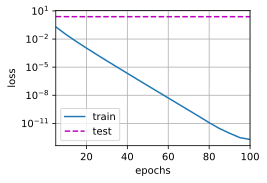

In [20]:
train_wd(0)

L2 norm of w: 0.041328445


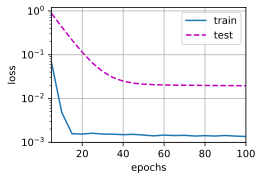

In [16]:
train_wd(3)

L2 norm of w: 0.053321768


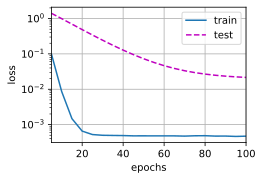